'''
https://github.com/nbhr/pycalib/blob/master/ipynb/incalib_charuco.ipynb
'''

# Camera Pose Estimation with OpenCV

### Goal

The goal of this notebook is to estimate the camera pose w.r.t. a reference object of known geometry such as a chessboard.

* Input: intrinsic parameter $K$, an image of a reference object (e.g. chessboard) and its 3D geometry
* Output: camera pose $R, t$ w.r.t. the reference object

Given a set of 2D-3D correspondences, the below solves a Perspective-n-Point (PnP) problem and obtain $R, t$ that satisfy $\tilde{x} \sim K (R|t)\tilde{X}$.


## Libraries

In [1]:
import sys, os, cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


## Calibration parameters

**Important**
* Compare the pattern shown below with the pattern captured in the image.
* The numbers of rows and cols indicate **the numbers of CELLs, not corners**.
  * For example, an 18x9 ChAruco board has a 18 cells == 17 corners by 9 cells == 8 corners pattern.
  * In the case of the traditional chessboard, the rows and cols indicate the numbers of corners.

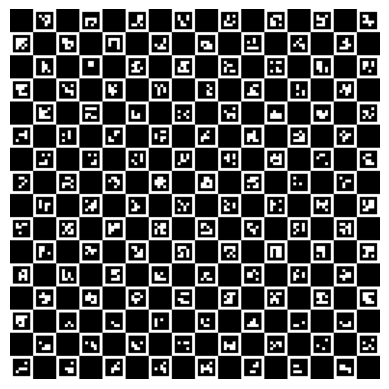

In [2]:
# Chessboard configuration
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
board = cv2.aruco.CharucoBoard((16, 16), 0.02, 0.015, aruco_dict)

# check if the board is correct
image = board.generateImage((2560, 2560))

plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

## Intrinsic Parameter

Use `incalib_charuco.ipynb` to get the intrinsic parameter.

In [3]:
# K =  np.array([[586.95061044,   0.,         640.86534378],
#                [  0.,         586.95061044, 356.28253051],
#                [  0.,           0.,           1.        ]])

# d =  np.array([[ 7.05473303e-01, -6.29813665e-01,  3.09176103e-04, -4.94115621e-04,
#                 -6.19825160e-02,  1.00148301e+00, -5.36482898e-01, -2.13796237e-01]])

K=np.load('K.npy')
d=np.load('d.npy')
d=d[:, :8]
print("Intrinsic parameter K = ", K)
print("Distortion parameters d = (k1, k2, p1, p2, k3, k4, k5, k6) = ", d)


Intrinsic parameter K =  [[916.20952966   0.         645.13103292]
 [  0.         916.20952966 341.6801127 ]
 [  0.           0.           1.        ]]
Distortion parameters d = (k1, k2, p1, p2, k3, k4, k5, k6) =  [[-4.19172540e+00 -5.92630296e+00 -8.53628367e-03 -4.32322496e-03
   1.93952880e+02 -4.25589677e+00 -5.50992489e+00  1.91163471e+02]]


## 2D chesscorner detection and PnP

In [4]:
save_dir = '/home/aris/projects/xarm6/xarm6_interface/utils/box_data'

input_files = glob(os.path.join(save_dir, 'color_*.png'))
input_files.sort()
input_files

['/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0000.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0001.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0002.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0003.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0004.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0005.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0006.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0007.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0008.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0009.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0010.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0011.png',
 '/home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0012.png',
 '/home/aris

2024-09-09 22:14:02.300 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0000.png


2024-09-09 22:14:02.370 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0001.png
2024-09-09 22:14:02.437 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0002.png


Translation : [[-0.20961233]
 [-0.12314449]
 [ 0.76154831]]
Rotation    : [[-0.70974945]
 [-0.07947867]
 [ 0.0967132 ]]
Distance from camera: 0.7994108630209887 m


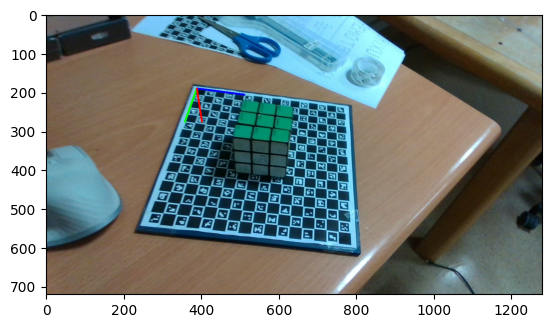

2024-09-09 22:14:02.650 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0003.png
2024-09-09 22:14:02.702 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0004.png
2024-09-09 22:14:02.732 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0005.png
2024-09-09 22:14:02.778 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0006.png


Translation : [[0.15903255]
 [0.10395026]
 [0.63698625]]
Rotation    : [[-0.30427886]
 [ 0.99441929]
 [ 2.71100366]]
Distance from camera: 0.6647168549780712 m


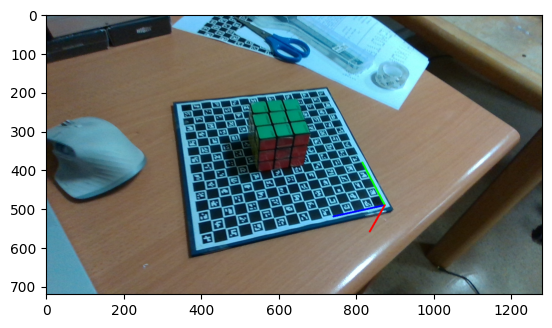

2024-09-09 22:14:02.978 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0007.png
2024-09-09 22:14:03.044 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0008.png


Translation : [[0.02511742]
 [0.17408702]
 [0.55781453]]
Rotation    : [[-0.12967016]
 [-0.94930298]
 [-2.42879558]]
Distance from camera: 0.5848882138949368 m


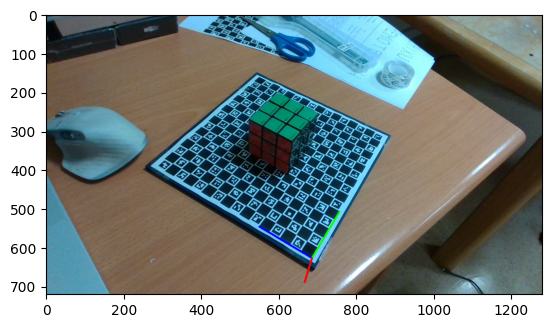

2024-09-09 22:14:03.250 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0009.png


Translation : [[-0.06459845]
 [ 0.17429584]
 [ 0.54329305]]
Rotation    : [[-0.34009131]
 [-0.81427432]
 [-1.94506609]]
Distance from camera: 0.5742119263969401 m


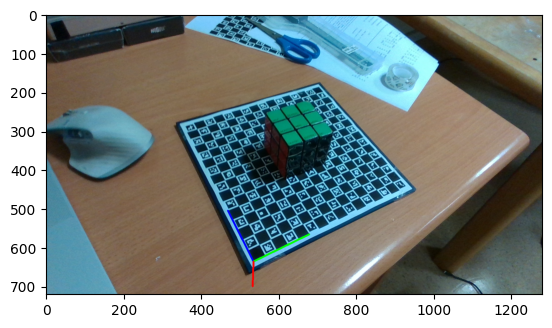

2024-09-09 22:14:03.494 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0010.png


Translation : [[-0.13538462]
 [ 0.14659457]
 [ 0.57309805]]
Rotation    : [[-0.47419323]
 [-0.70075516]
 [-1.58628488]]
Distance from camera: 0.6068445730747857 m


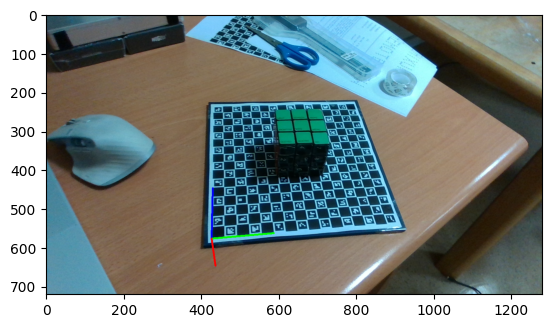

2024-09-09 22:14:03.750 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0011.png


Translation : [[-0.24854216]
 [ 0.04645035]
 [ 0.65131099]]
Rotation    : [[-0.63228143]
 [-0.46684486]
 [-0.94064002]]
Distance from camera: 0.6986679125597016 m


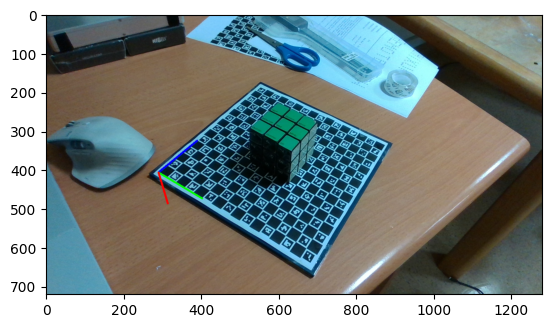

2024-09-09 22:14:04.020 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0012.png
2024-09-09 22:14:04.080 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0013.png


Translation : [[-0.19206964]
 [-0.10343507]
 [ 0.8049018 ]]
Rotation    : [[-0.7346719 ]
 [-0.07233716]
 [ 0.07251938]]
Distance from camera: 0.8339403209254125 m


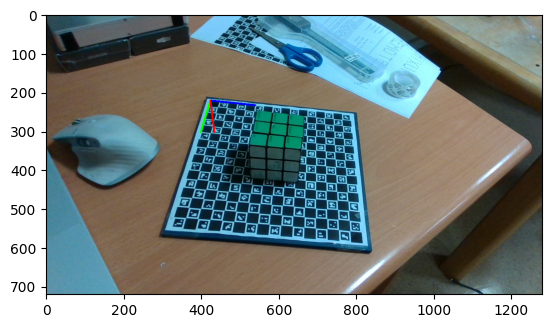

2024-09-09 22:14:04.316 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0014.png


Translation : [[-0.08243918]
 [-0.13129056]
 [ 0.8532802 ]]
Rotation    : [[-0.7489864 ]
 [ 0.14378905]
 [ 0.5890036 ]]
Distance from camera: 0.8672488308191282 m


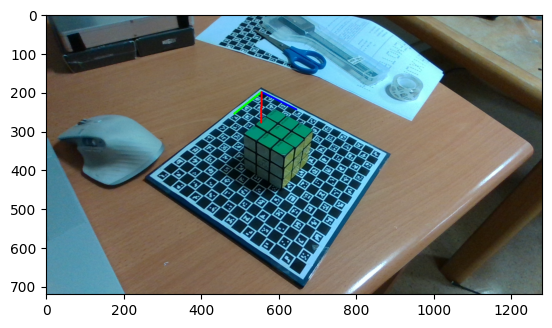

2024-09-09 22:14:04.548 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0015.png


Translation : [[ 0.00360051]
 [-0.13604142]
 [ 0.87340413]]
Rotation    : [[-0.73641855]
 [ 0.30370728]
 [ 0.97059938]]
Distance from camera: 0.8839428781671139 m


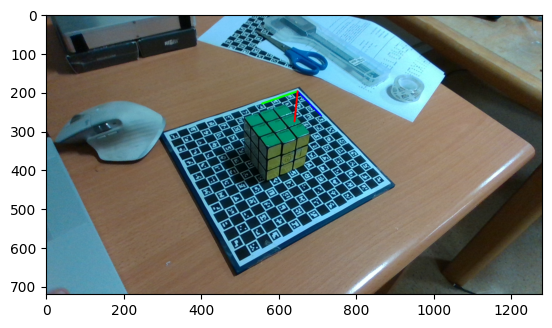

2024-09-09 22:14:04.774 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0016.png


Translation : [[ 0.08651744]
 [-0.10299828]
 [ 0.84978109]]
Rotation    : [[-0.6966407 ]
 [ 0.46355346]
 [ 1.35617232]]
Distance from camera: 0.8603614470445522 m


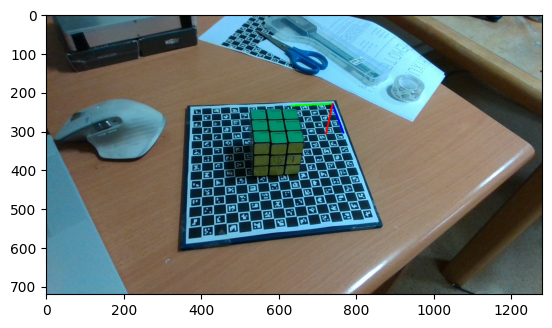

2024-09-09 22:14:04.990 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0017.png


Translation : [[ 0.16306009]
 [-0.0427639 ]
 [ 0.79963405]]
Rotation    : [[-0.60929951]
 [ 0.6462452 ]
 [ 1.78684147]]
Distance from camera: 0.8172098586356917 m


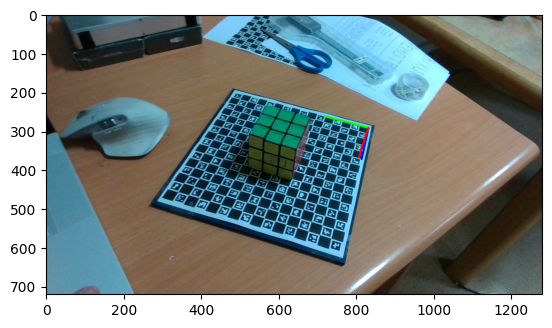

2024-09-09 22:14:05.231 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0018.png


Translation : [[0.18099823]
 [0.02747826]
 [0.74324332]]
Rotation    : [[-0.5041868 ]
 [ 0.81265488]
 [ 2.18309985]]
Distance from camera: 0.7654580650404471 m


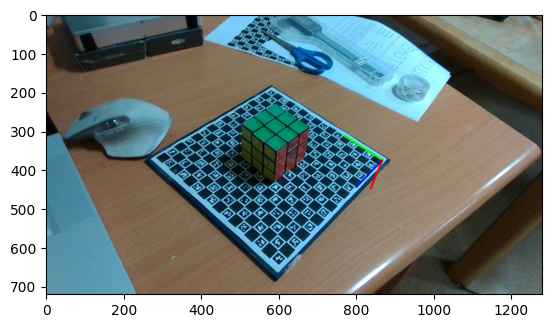

2024-09-09 22:14:05.441 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0019.png


Translation : [[0.16517694]
 [0.09928053]
 [0.67635557]]
Rotation    : [[-0.33415109]
 [ 0.98434833]
 [ 2.60079562]]
Distance from camera: 0.7032758380927586 m


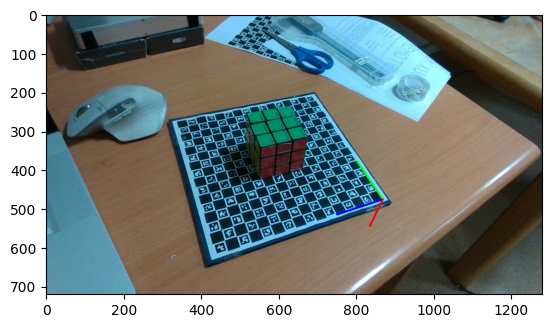

2024-09-09 22:14:05.669 | INFO     | __main__:<module>:7 - Processing /home/aris/projects/xarm6/xarm6_interface/utils/box_data/color_0020.png


Translation : [[0.11764184]
 [0.13225265]
 [0.63388154]]
Rotation    : [[-0.16564255]
 [ 1.12025641]
 [ 2.91695847]]
Distance from camera: 0.6581308170700839 m


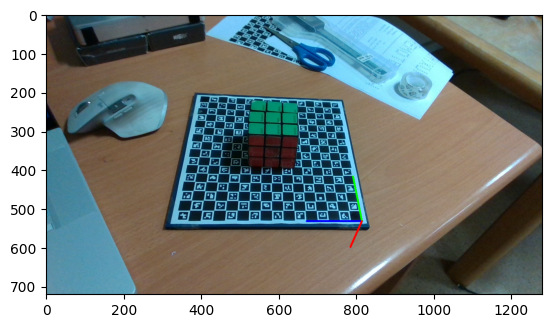

In [5]:
parameters = cv2.aruco.DetectorParameters()
parameters.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX
detector = cv2.aruco.CharucoDetector(board, detectorParams=parameters)

from loguru import logger as lgr
for i in input_files:
    lgr.info(f"Processing {i}")
    frame = cv2.imread(i)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    try:
        c_corners, c_ids, corners, ids = detector.detectBoard(cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY))
        objPoints, imgPoints = board.matchImagePoints(c_corners, c_ids)
        ret, p_rvec, p_tvec = cv2.solvePnP(objPoints, imgPoints, K, d)
        
        if p_rvec is None or p_tvec is None:
            continue
        if np.isnan(p_rvec).any() or np.isnan(p_tvec).any():
            continue
        cv2.drawFrameAxes(frame,
                        K,
                        d,
                        p_rvec,
                        p_tvec,
                        0.1)
        # cv2.aruco.drawDetectedCornersCharuco(frame, c_corners, c_ids)
        # cv2.aruco.drawDetectedMarkers(frame, corners, ids)
        # cv2.aruco.drawDetectedMarkers(frame, rejected_points, borderColor=(100, 0, 240))
    except cv2.error:
        continue

    print('Translation : {0}'.format(p_tvec))
    print('Rotation    : {0}'.format(p_rvec))
    print('Distance from camera: {0} m'.format(np.linalg.norm(p_tvec)))

    plt.figure()
    plt.imshow(frame)
    plt.show()
